In [14]:
import networkx as nx
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cities = pd.read_csv('data/Top50/top50cities.csv',delimiter=',')

#import nodes to get id from nodes/hosts
hosts = pd.DataFrame() #creates a new dataframe that's empty
for idx,city in cities.iterrows():#.loc[cities['2017']>50000].iterrows():
    for p in range(1,14):
        if (os.path.exists('data/Top50/hosts/'+city['name']+str(p)+'.csv')):
            df = pd.read_csv('data/Top50/hosts/'+city['name']+str(p)+'.csv',index_col=False)
            hosts = pd.concat([hosts,df]).reset_index(drop=True)
print(len(hosts))
hosts=hosts.drop_duplicates()
print(len(hosts))


rev = pd.DataFrame() #creates a new dataframe that's empty
for idx,city in cities.iterrows():#.loc[cities['2017']>50000].iterrows():
    if os.path.exists('data/Top50//reviews/'+city['name']+'Rev.csv'):
        df = pd.read_csv('data/Top50/reviews/'+city['name']+'Rev.csv',index_col=False)
        rev = pd.concat([rev,df]).reset_index(drop=True)
print(len(rev))
rev=rev.drop_duplicates()
print(len(rev))

def getColorfromCmap(val): 
    cmap = cm.get_cmap('tab20') 
    return cmap(val)

legend_city=[city['name'] for idx,city in cities.iterrows()]
legend_city.append('outside')
legend_col=[getColorfromCmap(idx/(len(legend_city)-1)) for idx,x in enumerate(legend_city)]


#Creating the graph G
G = nx.DiGraph()
links = []
user_id_unique=set(hosts['id'].tolist())
#G.add_nodes_from(user_id_unique)
G.add_nodes_from([(rows['id'],{'city':rows['city']}) for idx,rows in hosts.iterrows()])

G.add_edges_from([(rows['to'],rows['from'])for index,rows in rev[['to','from','relationshipType']].iterrows() if rows['relationshipType']=='host'])
G.add_edges_from([(rows['from'],rows['to'])for index,rows in rev[['to','from','relationshipType']].iterrows() if rows['relationshipType']=='surf'])


10586
10582
96090
96085


In [15]:

#plotting betweenness centrality of network

betweenness_centrality = nx.betweenness_centrality(G, k=100)


print("\n  Number of nodes with betweenness centrality equal to 0: ",list(betweenness_centrality.values()).count(0.0),"\n\n")



  Number of nodes with betweenness centrality equal to 0:  93894 




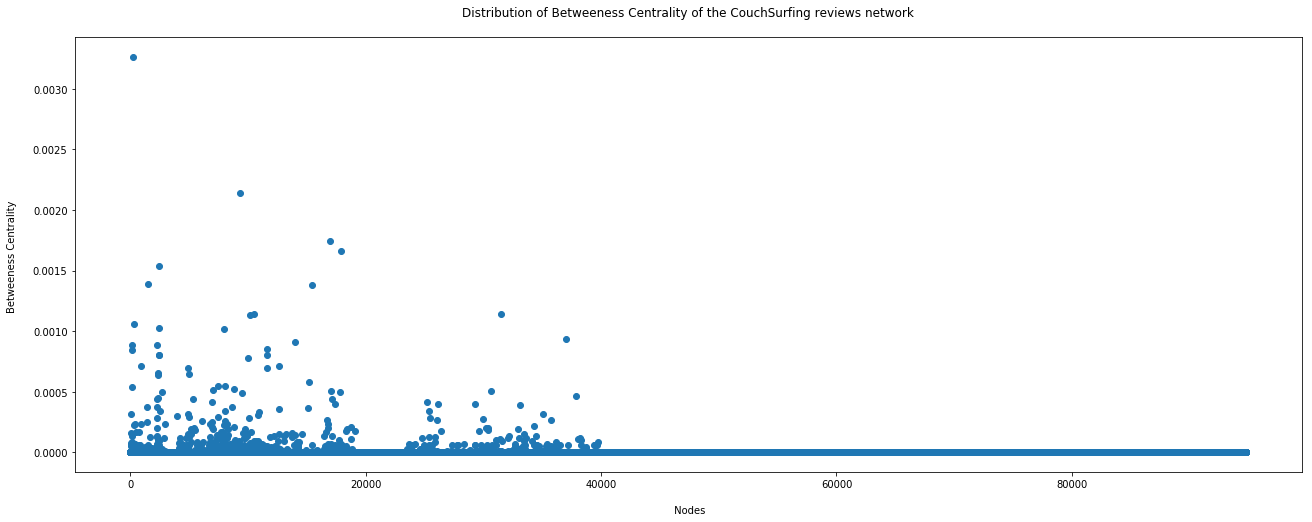

In [7]:
plt.figure(figsize = (22,8))
plt.plot(list(betweenness_centrality.values()),'o') 
plt.title("Distribution of Betweeness Centrality of the CouchSurfing reviews network\n")
plt.xlabel("\n Nodes")
plt.ylabel("Betweeness Centrality \n")
plt.show()

In [16]:
node_to_city_dict = dict()
for node in G.nodes(data=True):
    if node[1]:
        if node[0] not in node_to_city_dict:
            node_to_city_dict[node[0]] = node[1]['city']
    else:
        node_to_city_dict[node[0]] = 'outside'
    
    
    
beetweennes_centrality_nodes_by_city = dict()
for key, value in betweenness_centrality.items():
    if value > 0.0 :
        city = node_to_city_dict[key]
        if city not in beetweennes_centrality_nodes_by_city:
            beetweennes_centrality_nodes_by_city[city] = []
        beetweennes_centrality_nodes_by_city[city].append(tuple([key, value]))
            




In [17]:
for key1, value in beetweennes_centrality_nodes_by_city.items():
    value.sort(key=lambda x: x[1], reverse=True)

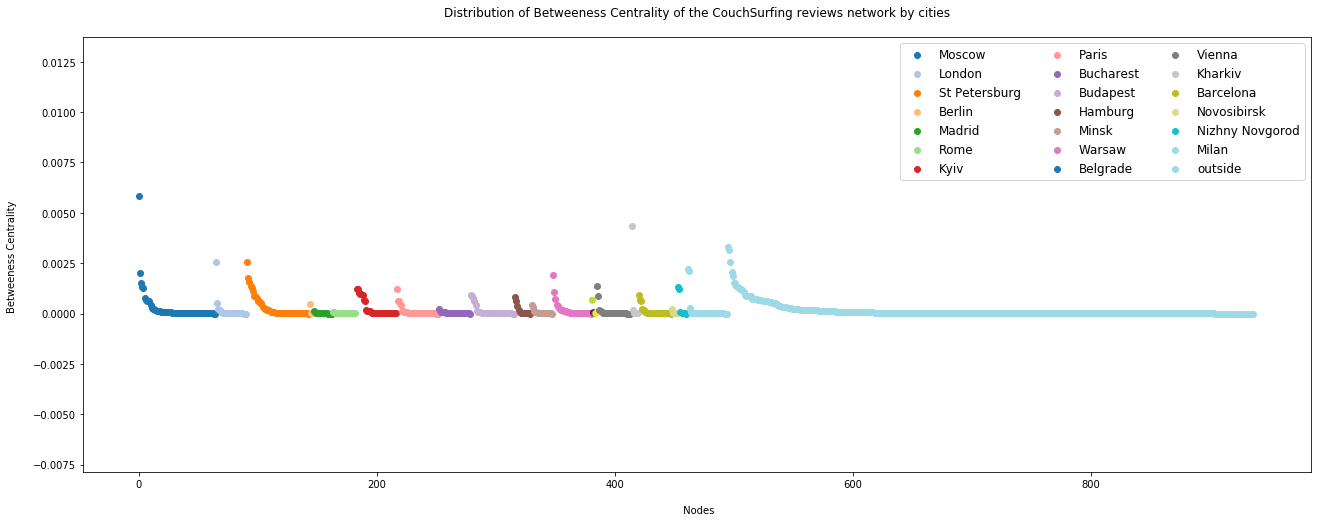

In [23]:
plt.figure(figsize = (22,8))
 
    
scatter_list = []
h = 0
for idx, city in enumerate(legend_city,start=0):
    bc_values = [ el[1] for el in beetweennes_centrality_nodes_by_city[city]]
    scatter_list.append(plt.scatter( range(h, h + len(bc_values)), bc_values , c=legend_col[idx] )) 
    h = h + len(bc_values)
    
plt.legend(tuple(scatter_list),
           tuple(legend_city),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=12)

plt.title("Distribution of Betweeness Centrality of the CouchSurfing reviews network by cities\n")
plt.xlabel("\n Nodes")
plt.ylabel("Betweeness Centrality \n")
#plt.savefig('In-Out degree distribution of CouchSurfing reviews network.png' , dpi = 500)
plt.show()

Anallogicly for ec

In [ ]:
comuunity det